#### Task 1. Create a human mobility network for MA using the provided csv file.          
#### network node: individual census block group (neighborhood) in MA
#### network edge: residents from one neighborhood visiting another
#### weight of network tie: percentage of residents from one neighborhood visiting another         
#### How many nodes and edges are there in your network? 

- There are 40292 nodes and 742299 edges in this network. 

In [3]:
# set up data 
import os 
import pandas as pd
import networkx as nx 
import numpy as np

os.chdir("/Users/[editted]/Documents/compsoc/code/MA_cbg_human_mobility_2019")

ma_df = pd.read_csv('MA_cbg2cbg_2019_01.csv')
print(ma_df.columns, ma_df.shape)
ma_df.head()

Index(['poi_cbg', 'year_month', 'raw_device_counts', 'visitor_census_tract',
       'visitor_count'],
      dtype='object') (840593, 5)


,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
0,250250303003,2019_1,19187,250250303003,413
1,250250303003,2019_1,19187,250251010016,182
2,250250303003,2019_1,19187,440070008003,122
3,250250303003,2019_1,19187,250250923002,121
4,250250303003,2019_1,19187,250173686001,112


In [4]:
# create a network 
G = nx.Graph()

for i in range(len(ma_df)):
    origin_cbg = ma_df.loc[i, 'poi_cbg']
    destination_cbg = ma_df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = ma_df.loc[i, 'raw_device_counts']
    num_visitor = ma_df.loc[i, 'visitor_count']
    percent_visitor = num_visitor / total_residents_in_origin
#     print(origin_cbg, destination_cbg, percent_visitor)
    G.add_edge(origin_cbg, destination_cbg, weight=percent_visitor) #add edges

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 40292
Number of edges: 742299
Average degree:  36.8460


#### Task 2. Calculate weighted node degree and unweighted node degree for each census block group in the mobility network and use the results to create a pandas dataframe. The dataframe should have three columns. One column stores the census block group id, and the other two the two calculated node degrees. 

In [5]:
# calculate degrees
# G.degree()
# G.degree(weight='weight') 

# degree dataframe
df_degree = pd.DataFrame(G.degree(), columns=["node", "unweighted degree"])

# weighted degree dataframe
df_weighted_degree = pd.DataFrame(G.degree(weight="weight"), columns=["node", "weighted degree"])

# merge two dataframes
df=df_degree.merge(df_weighted_degree,on='node')
df

,node,unweighted degree,weighted degree
0,250250303003,2936,1.617298
1,250251010016,609,1.829781
2,440070008003,77,0.201907
3,250250923002,600,2.675362
4,250173686001,3217,1.763752
...,...,...,...
40287,170318261003,1,0.000726
40288,120310144111,1,0.000726
40289,530330294073,1,0.000726
40290,360610165001,1,0.000726


#### Task 3. Create a plot that visualizes the distribution of the weighted node degrees. Is the human mobility network a scale-free network? In other words, does the degree distribution follow a power law? 

- Yes, it is a scale-free network and the degree distribution follows a power law. 

<AxesSubplot:xlabel='weighted degree'>

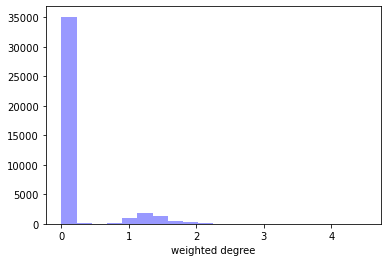

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn histogram
sns.distplot(df['weighted degree'], hist=True, kde=False, 
             bins=20, color = 'blue')


In [ ]:
### Bonus task: Does this network follow the “six degrees of separation” principle? Find out ways to analyze the network to answer this question. 

# df=pd.DataFrame(nx.shortest_path(G),columns=["source", "target","distance"])
# df.describe() ###could not generate results 